<a href="https://colab.research.google.com/github/andrevcmelo/Custo-medio-m2-Pernambuco/blob/master/Exerc%C3%ADcio_ST_Andr%C3%A9_Melo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Base de Dados 1 - Custo Médio do m² em Pernambuco

Base de Dados: **Custo médio do m2 (Filtro em "Pernambuco")**

Link: https://seriesestatisticas.ibge.gov.br/series.aspx?no=11&op=0&vcodigo=PRECO415&t=custo-medio-m2

## Importação de Dados

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from statsmodels.tsa.arima_model import ARIMA
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error as MSE

In [ ]:
path = 'https://raw.githubusercontent.com/andrevcmelo/test/master/custo_m2_pernambuco_IBGE.csv'
dados = pd.read_csv(path, sep=';')

dados['Data'] = pd.to_datetime(dados['Data'])
dados.set_index('Data', inplace=True)
dados['Custo'] = round(dados['Custo'],2)

In [ ]:
dados.describe()

,Custo
count,3.880000e+02
mean,1.424163e+05
std,9.018569e+05
min,1.640000e+02
25%,3.268100e+02
50%,6.734650e+02
75%,9.766600e+02
max,1.083839e+07


In [ ]:
dados.head()

,Custo
Data,
1986-01-03,1682.33
1986-01-04,1712.90
1986-01-05,1737.75
1986-01-06,1767.32
1986-01-07,1783.61


## Pré processamento

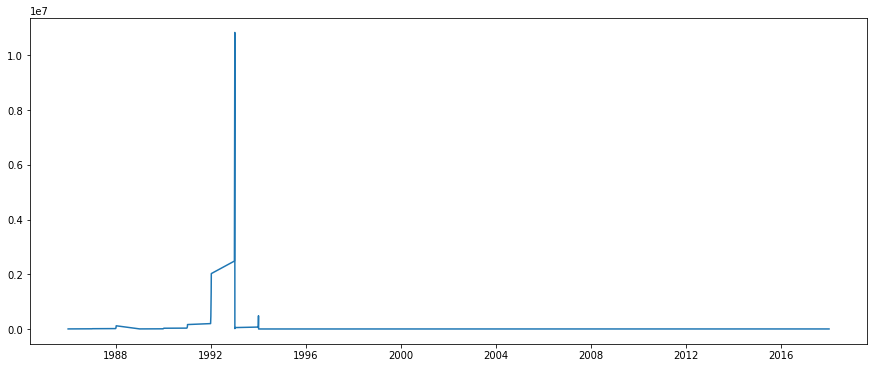

In [ ]:
plt.plot(dados['Custo'])

In [ ]:
dados = dados.loc['1995':]

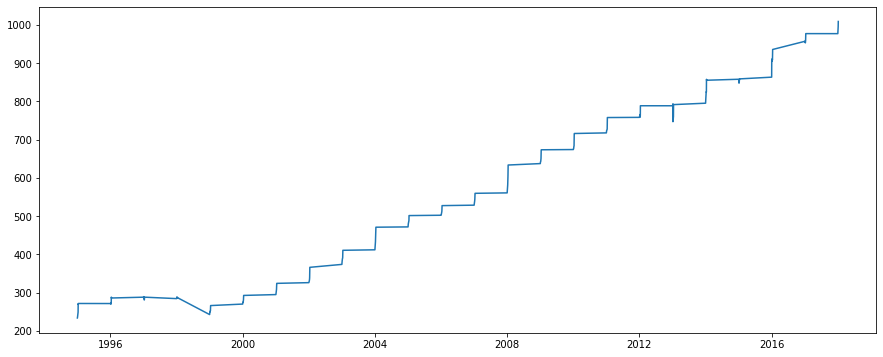

In [ ]:
plt.plot(dados['Custo'])

Como em Fevereiro de 1994 houve o Plano Real, o valor do custo provavelmente irá variar por conta da diferença de moedas. Diante disto, realizamos o corte dos dados para iniciar em Jan/1995.

In [ ]:
dados.tail(10)

,Custo
Data,
2017-01-09,957.34
2017-01-10,958.46
2017-01-11,971.01
2017-01-12,976.72
2018-01-01,976.64
2018-01-02,981.31
2018-01-03,987.27
2018-01-04,987.86
2018-01-05,995.63


De acordo com o dados.tail(), o último ano (2018) não está completo. Por esse motivo, iremos definir o ano final em 2017, por questões de ter um ano cheio para validar o teste.

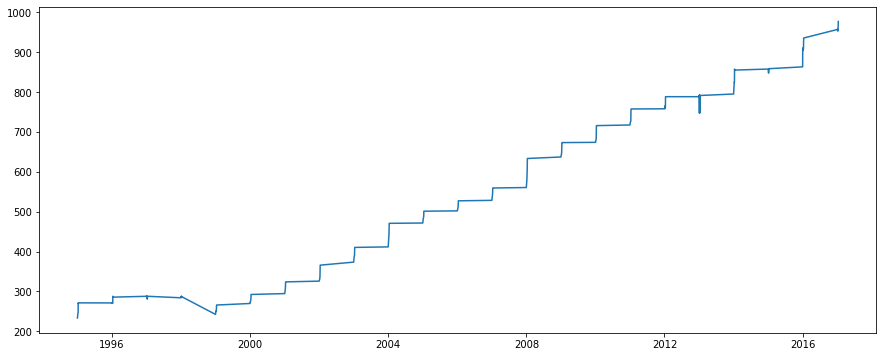

In [ ]:
dados = dados.loc['1995':'2017']
plt.plot(dados['Custo'])

## Estimando e Tratando Tendência e Sazonalidade

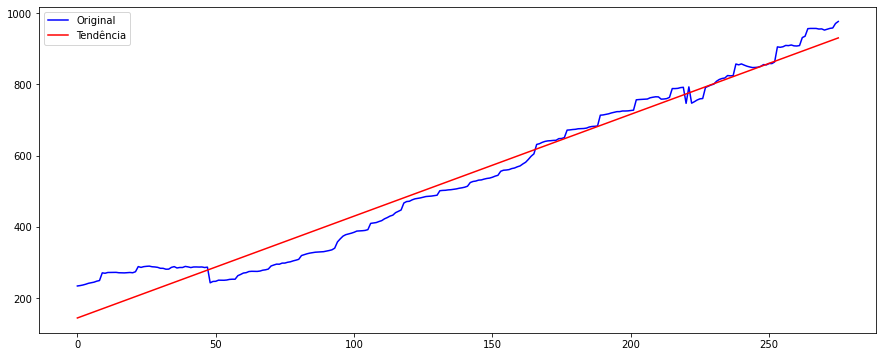

In [ ]:
serie = dados

#utilizando regressão linear para modelar tendência
from sklearn.linear_model import LinearRegression

X = [i for i in range(0, len(serie))] #indices
X = np.reshape(X, (len(X), 1))
y = serie
modelo = LinearRegression()
modelo.fit(X, y)

#estimando tendência
tendencia = modelo.predict(X)

#plotando tendência nos dados
plt.plot(serie.values, color='blue',label='Original')
plt.plot(tendencia,color='red', label='Tendência' )
plt.legend(loc='best')
plt.show()

In [ ]:
#eliminando a tendência
serie_sem_tendencia = serie - tendencia

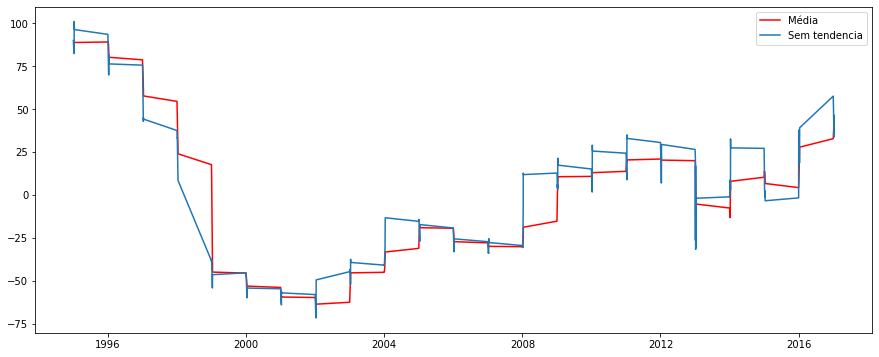

In [ ]:
#Plotando os dados sem tendência
m_m = serie_sem_tendencia.rolling(window=12).mean()
mean = plt.plot(m_m, color='red',label='Média')
plt.plot(serie_sem_tendencia, label='Sem tendencia')
plt.legend(loc='best')
plt.show()

In [ ]:
# fit polynomial
from numpy import polyfit

X = [i for i in range(0, len(serie_sem_tendencia))]
y = serie_sem_tendencia.Custo
degree = 50
coef = polyfit(X, y, degree)
print('Coefficients: %s' % coef)

Coefficients: [-5.73711276e-111  3.97431380e-108 -1.48478149e-106 -2.19921955e-103
 -3.63283911e-101  4.02340709e-099  3.54208342e-096  8.92666901e-094
  7.02752750e-092 -3.57955600e-089 -1.81604149e-086 -4.38270806e-084
 -4.07295867e-082  1.52675951e-079  8.91178209e-077  2.42287443e-074
  3.16147485e-072 -5.02977709e-070 -4.28251624e-067 -1.31727897e-064
 -2.01696961e-062  1.83313478e-060  2.18011341e-057  6.88149704e-055
  9.50215877e-053 -1.60993715e-050 -1.27139824e-047 -3.19660297e-045
 -1.27595029e-043  1.94767763e-040  6.85531214e-038  5.25469101e-036
 -3.63757092e-033 -1.25413444e-030  8.26365529e-031  9.04517556e-026
  1.20753529e-023 -5.28375876e-021 -9.55055636e-019  3.81501735e-016
  8.03807065e-015 -1.90896501e-011  3.87294137e-009 -4.12954352e-007
  2.70839205e-005 -1.12724234e-003  2.92458800e-002 -4.46445089e-001
  3.51272968e+000 -1.09304263e+001  9.38226152e+001]


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
curva = []
for i in range(len(X)):
    value = coef[-1]
    for d in range(degree):
        value += X[i]**(degree-d) * coef[d]
    curva.append(value)


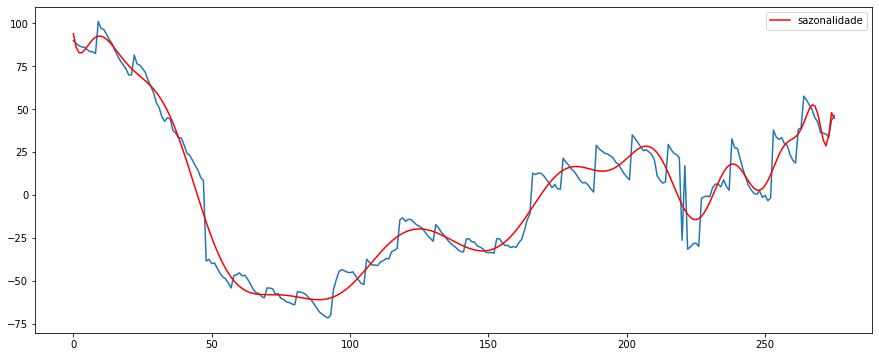

In [ ]:
plt.plot(serie_sem_tendencia.values)
plt.plot(curva, color='red', label='sazonalidade')
plt.legend(loc='best')
plt.show()

**Não foi identificado sazonalidade na série de dados**

Os dados em si apresentam uma característica de tendência de crescimento no preço do m², entretanto, sem uma sazonalidade identificada. O que podemos identificar que ao longo do tempo o m² no Estado de Pernambuco vai sendo valorizado.

## Avaliando Ruído

In [ ]:
import statsmodels.graphics.tsaplots as smt

In [ ]:
rcParams['figure.figsize'] = 15, 6

In [ ]:
def acf_pacf(x, qtd_lag):
    fig = plt.figure(figsize=(16,10))
    ax1 = fig.add_subplot(221)
    fig = sm.graphics.tsa.plot_acf(x, lags=qtd_lag, ax=ax1)
    ax2 = fig.add_subplot(222)
    fig = sm.graphics.tsa.plot_pacf(x, lags=qtd_lag, ax=ax2)
    plt.show()

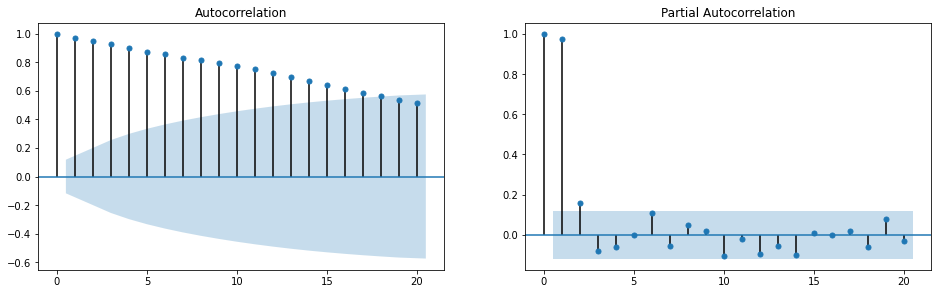

In [ ]:
qtd_lag = 20
acf_pacf(serie_sem_tendencia, qtd_lag)

### Definindo bases de treino e teste

In [ ]:
train_data, test_data = serie_sem_tendencia.loc['1995':'2016'], serie_sem_tendencia.loc['2017':]

## ARIMA

### Modelagem

In [ ]:
def MAPE(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
#parâmetros
p,d,q = 1, 1, 1

In [ ]:
model = ARIMA(train_data.values, order=(p,d,q)).fit()

In [ ]:
model.predict(typ='levels')

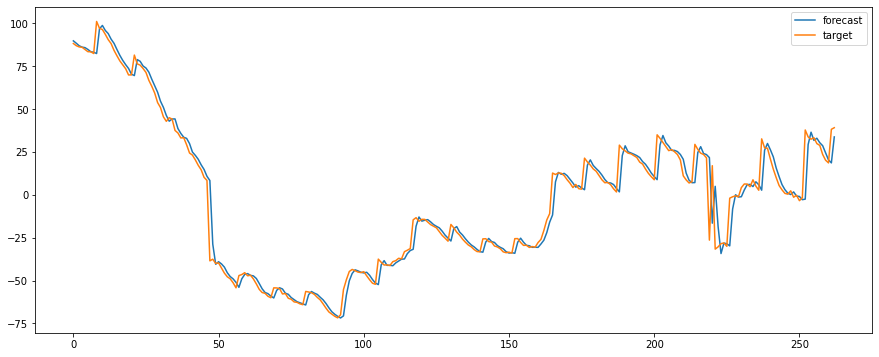

In [ ]:
plt.plot(model.predict(typ='levels'), label = 'forecast')
plt.plot(train_data.values[1:], label = 'target')
plt.legend()
plt.show()

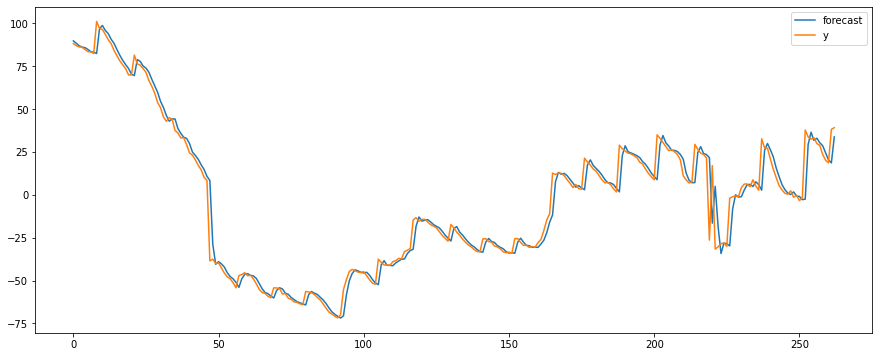

In [ ]:
model.plot_predict();

### Avaliação

In [ ]:
train_predict = model.predict(typ='levels')
residuo = train_data.Custo.values[1:] - train_predict

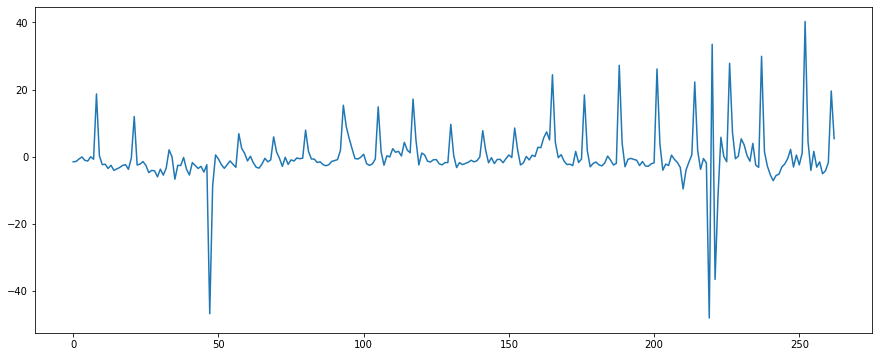

In [ ]:
plt.plot(residuo);

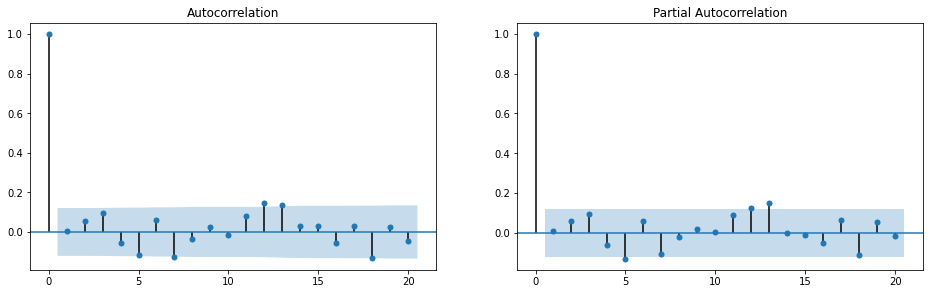

In [ ]:
acf_pacf(residuo, 20)

In [ ]:
MAPE(train_data.Custo.values[1:],train_predict )

30.008165591451885

In [ ]:
MSE(train_data.Custo.values[1:],train_predict)

65.18379802569922

`Apesar do valor considerado elevado no MAPE, podemos ver no gráfico de predição os valores de predição muito próximos aos da base de teste.`

### Teste

In [ ]:
predict_test = model.forecast(len(test_data))[0]

In [ ]:
test_data.Custo.values

array([57.48818013, 55.2472472 , 52.20631427, 49.47538134, 44.91444841,
       42.53351548, 36.31258255, 35.93164963, 35.4007167 , 33.65978377,
       43.34885084, 46.19791791])

In [ ]:
predict_test

array([39.72583901, 39.13941523, 39.13443554, 38.8575037 , 38.70776891,
       38.49854171, 38.31714021, 38.12272412, 37.93439519, 37.74321918,
       37.55337481, 37.3629076 ])

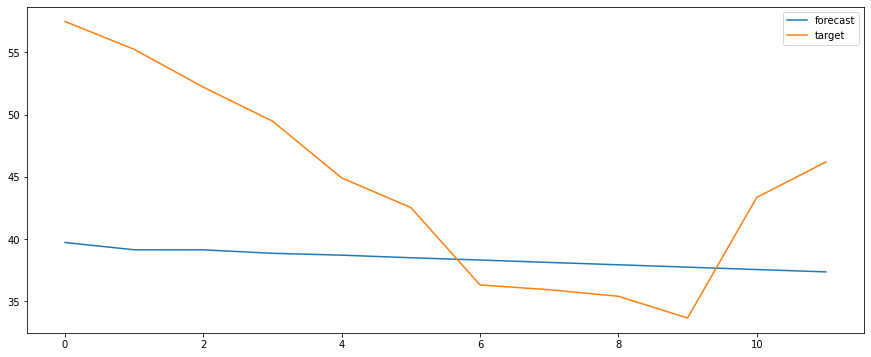

In [ ]:
plt.plot(predict_test, label = 'forecast')
plt.plot(test_data.Custo.values, label = 'target')
plt.legend()
plt.show()

In [ ]:
MAPE(test_data.Custo.values,predict_test )

16.10491884917806

In [ ]:
MSE(test_data.Custo.values,predict_test)

88.07818465390638

## MLP

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [ ]:
train_data, test_data = dados.loc['1995':'2016'], dados.loc['2017':]

In [ ]:
def acf_pacf(x, qtd_lag):
    fig = plt.figure(figsize=(16,10))
    ax1 = fig.add_subplot(221)
    fig = sm.graphics.tsa.plot_acf(x, lags=qtd_lag, ax=ax1)
    ax2 = fig.add_subplot(222)
    fig = sm.graphics.tsa.plot_pacf(x, lags=qtd_lag, ax=ax2)
    plt.show()

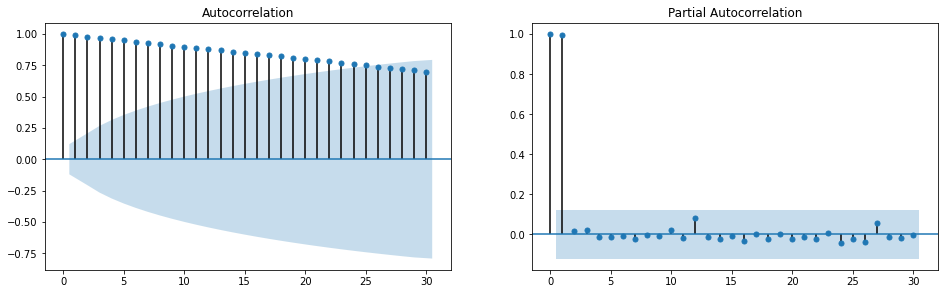

In [ ]:
qtd_lag = 30
acf_pacf(train_data, qtd_lag)

In [ ]:
def create_sliding_windows(series, window_size):
   
    list_of_sliding_windows = []
    list_size_to_iterate = len(series) - window_size 
    for i in range(0, list_size_to_iterate):
        window = series[i: i + window_size + 1]
        list_of_sliding_windows.append(window)

    return np.array(list_of_sliding_windows).reshape(len(list_of_sliding_windows), window_size+1)

In [ ]:
windows_train = create_sliding_windows(train_data.values, 20)

In [ ]:
perc_val = 0.2
tam_val = np.fix(len(windows_train) *perc_val).astype(int)

In [ ]:
X_train, y_train = windows_train[0:-tam_val, 0:-1], windows_train[0:-tam_val, -1]
X_val, y_val = windows_train[-tam_val:, 0:-1], windows_train[-tam_val:, -1]

In [ ]:
train_data['Custo'].values[-20:]

array([847.2 , 847.55, 848.34, 850.75, 855.55, 854.68, 858.69, 858.4 ,
       862.94, 905.32, 904.15, 905.66, 909.39, 908.83, 910.66, 908.23,
       907.75, 909.03, 931.47, 935.26])

In [ ]:
pontos_anteriores_test = train_data['Custo'].values[-20:]
test = np.hstack([pontos_anteriores_test, test_data['Custo'].values])

In [ ]:
windows_test = create_sliding_windows(test, 20)

In [ ]:
X_test, y_test = windows_test[:, 0:-1], windows_test[:, -1]

### Seleção de Lags

In [ ]:
def select_lag_acf(serie, max_lag):
    from statsmodels.tsa.stattools import acf
    x = serie[0: max_lag+1]
    
    acf_x, confint = acf(serie, nlags=max_lag, alpha=.05, fft=False, unbiased=False)
    
    limiar_superior = confint[:, 1] - acf_x
    limiar_inferior = confint[:, 0] - acf_x

    lags_selecionados = []
    
    for i in range(1, max_lag+1):

        
        if acf_x[i] >= limiar_superior[i] or acf_x[i] <= limiar_inferior[i]:
            lags_selecionados.append(i-1)  #-1 por conta que o lag 1 em python é o 0
    
    #caso nenhum lag seja selecionado, essa atividade de seleção para o gridsearch encontrar a melhor combinação de lags
    if len(lags_selecionados)==0:
        print('NENHUM LAG POR ACF')
        lags_selecionados = [i for i in range(max_lag)]

    print('LAGS', lags_selecionados)

    #inverte o valor dos lags para usar na lista de dados
    lags_selecionados = [max_lag - (i+1) for i in lags_selecionados]



    return lags_selecionados

In [ ]:
lags_sel = select_lag_acf(train_data, 20)

LAGS [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [ ]:
X_train[0]

array([233.64, 234.78, 236.37, 238.5 , 241.16, 242.71, 244.31, 247.12,
       248.95, 270.51, 269.39, 271.52, 271.57, 271.36, 271.9 , 270.81,
       270.54, 270.43, 270.95, 271.56])

In [ ]:
X_train[0, lags_sel]

array([271.56, 270.95, 270.43, 270.54, 270.81, 271.9 , 271.36, 271.57,
       271.52, 269.39, 270.51, 248.95, 247.12, 244.31, 242.71, 241.16,
       238.5 , 236.37, 234.78, 233.64])

In [ ]:
X_train = X_train[:,lags_sel ]
X_val = X_val[:, lags_sel]
X_test = X_test[:, lags_sel]

### Modelagem/Treinamento

In [ ]:
def treinar_mlp(x_train, y_train, x_val, y_val, num_exec):
    
    neuronios = [5, 10, 25]#, 20, 30, 40, 50]#, 60, 70, 80, 90, 100, 120, 150, 170, 200]
    func_activation = [ 'relu']#, 'tanh'] 
    alg_treinamento = ['lbfgs', 'sgd']#, 'adam']
    max_iteracoes = [10000]
    learning_rate = ['adaptive']#, 'invscaling', 'adaptive']

    best_result = np.Inf
    for i in range(0,len(neuronios)):
        for j in range(0,len(func_activation)):
            for l in range(0,len(alg_treinamento)):
                for m in range(0,len(max_iteracoes)):
                    for n in range(0,len(learning_rate)):
                        for e in range(0,num_exec):
                            mlp = MLPRegressor(hidden_layer_sizes=neuronios[i], activation=func_activation[j], solver=alg_treinamento[l], max_iter = max_iteracoes[m], learning_rate= learning_rate[n])
                            mlp.fit(x_train, y_train)
                            predict_validation = mlp.predict(x_val)
                            
                            mse = MSE(y_val, predict_validation)
                            

                            if mse < best_result:
                                best_result = mse
                                select_model = mlp
                                
                                    
    
    
    
    return select_model

In [ ]:
modelo =  treinar_mlp(X_train, y_train, X_val, y_val, 2)

In [ ]:
trainPredict = modelo.predict(X_train)

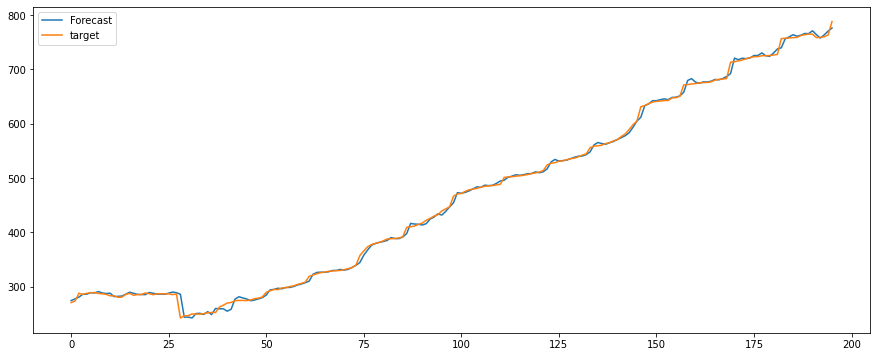

In [ ]:
plt.plot(trainPredict, label='Forecast')
plt.plot(y_train, label='target')
plt.legend()
plt.show()

In [ ]:
def MAPE(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
MAPE(y_train,trainPredict)

0.8025002652469817

In [ ]:
MSE(y_train,trainPredict)

31.22016705638254

### Teste

In [ ]:
testPredict = modelo.predict(X_test)

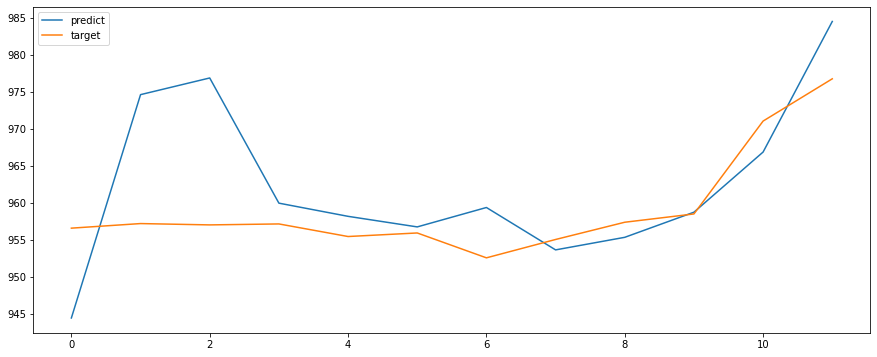

In [ ]:
plt.plot(testPredict, label = 'predict')
plt.plot(y_test, label= 'target')
plt.legend()
plt.show()

In [ ]:
MAPE(y_test,testPredict)

0.6792113544556434

In [ ]:
MSE(y_test,testPredict)

82.56950178401131

## KNN

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [ ]:
def acf_pacf(x, qtd_lag):
    fig = plt.figure(figsize=(16,10))
    ax1 = fig.add_subplot(221)
    fig = sm.graphics.tsa.plot_acf(x, lags=qtd_lag, ax=ax1)
    ax2 = fig.add_subplot(222)
    fig = sm.graphics.tsa.plot_pacf(x, lags=qtd_lag, ax=ax2)
    plt.show()

In [ ]:
def create_sliding_windows(series, window_size):
   
    list_of_sliding_windows = []
    list_size_to_iterate = len(series) - window_size 
    for i in range(0, list_size_to_iterate):
        window = series[i: i + window_size + 1]
        
        list_of_sliding_windows.append(window)




    return np.array(list_of_sliding_windows).reshape(len(list_of_sliding_windows), window_size+1)

In [ ]:
windows_train = create_sliding_windows(train_data.values, 20)

In [ ]:
windows_train.shape

(244, 21)

### Definindo tamanho da base de validação

In [ ]:
perc_val = 0.3
tam_val = np.fix(len(windows_train) *perc_val).astype(int)

In [ ]:
tam_val

73

### Definindo base de validação, treino e teste

In [ ]:
X_train, y_train = windows_train[0:-tam_val, 0:-1], windows_train[0:-tam_val, -1]

X_val, y_val = windows_train[-tam_val:, 0:-1], windows_train[-tam_val:, -1]

In [ ]:
X_train.shape

(171, 20)

In [ ]:
pontos_anteriores_test = train_data['Custo'].values[-20:]
test = np.hstack([pontos_anteriores_test, test_data['Custo'].values])

In [ ]:
windows_test = create_sliding_windows(test, 20)

In [ ]:
X_test, y_test = windows_test[:, 0:-1], windows_test[:, -1]

### Seleção de lags

In [ ]:
def select_lag_acf(serie, max_lag):
    from statsmodels.tsa.stattools import acf
    x = serie[0: max_lag+1]
    
    acf_x, confint = acf(serie, nlags=max_lag, alpha=.05, fft=False,
                             unbiased=False)
    
    
    limiar_superior = confint[:, 1] - acf_x
    limiar_inferior = confint[:, 0] - acf_x

    lags_selecionados = []
    
    for i in range(1, max_lag+1):

        
        if acf_x[i] >= limiar_superior[i] or acf_x[i] <= limiar_inferior[i]:
            lags_selecionados.append(i-1)  #-1 por conta que o lag 1 em python é o 0
    
    #caso nenhum lag seja selecionado, essa atividade de seleção para o gridsearch encontrar a melhor combinação de lags
    if len(lags_selecionados)==0:


        print('NENHUM LAG POR ACF')
        lags_selecionados = [i for i in range(max_lag)]

    print('LAGS', lags_selecionados)

    #inverte o valor dos lags para usar na lista de dados
    lags_selecionados = [max_lag - (i+1) for i in lags_selecionados]



    return lags_selecionados

In [ ]:
lags_sel = select_lag_acf(train_data, 20)

LAGS [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [ ]:
X_train = X_train[:,lags_sel ]
X_val = X_val[:, lags_sel]
X_test = X_test[:, lags_sel]

### Modelagem/Treinamento

In [ ]:
import itertools

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error as MSE

def treinar_knn(x_train, y_train, x_val, y_val):
    
    k = [2, 4, 8, 10,20]
    metric = ['euclidean', 'minkowski']
    
    hyper_param = list(itertools.product(k,metric))

    best_result = np.Inf
    for i, j  in hyper_param:

      knn = KNeighborsRegressor(n_neighbors=i,  metric=j)
      knn.fit(x_train, y_train)
      predict_validation = knn.predict(x_val)
      mse = MSE(y_val, predict_validation)

      if mse < best_result:
          best_result = mse
          select_model = knn
                                
                                    
    
    
    
    return select_model

In [ ]:
modelo =  treinar_knn(X_train, y_train, X_val, y_val)

In [ ]:
trainPredict = modelo.predict(X_train)

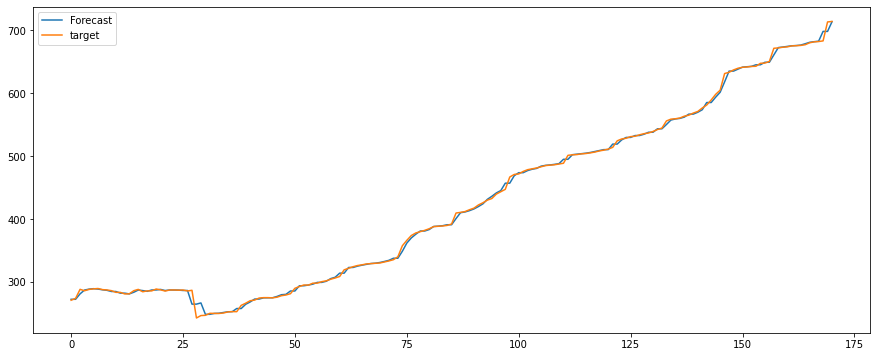

In [ ]:
plt.plot(trainPredict, label='Forecast')
plt.plot(y_train, label='target')
plt.legend()
plt.show()

In [ ]:
def MAPE(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
MAPE(y_train,trainPredict)

0.603337717749679

In [ ]:
MSE(y_train,trainPredict)

18.289553070175437

### Teste

In [ ]:
testPredict = modelo.predict(X_test)

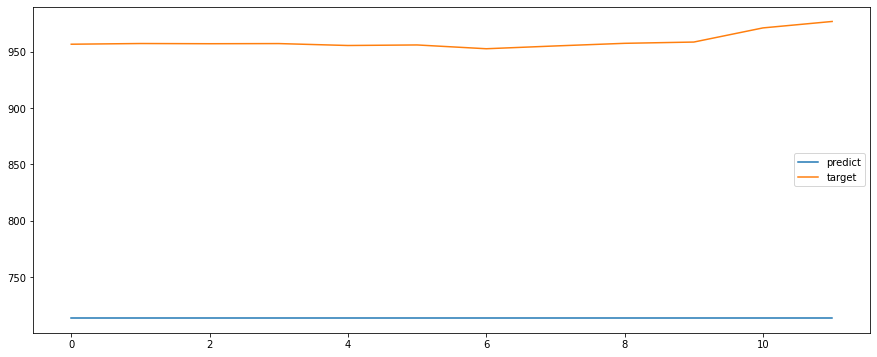

In [ ]:
plt.plot(testPredict, label = 'predict')
plt.plot(y_test, label= 'target')
plt.legend()
plt.show()

In [ ]:
MAPE(y_test,testPredict )

25.582199026211576

In [ ]:
MSE(y_train,trainPredict)

18.289553070175437

## Conclusão

Com os treinamentos e testes realizados:

1.   MLP se mostrou mais preciso na predição
2.   ARIMA se mostrou menos preciso
3.   KNN, bom em treinamento, mas precisa de melhores tratamentos de dados para ser útil em teste

Adicionalmente, em particular, o MLP foi de melhor entendimento para mim, portanto, mais cômodo em estudar e realizar aprofundamentos nos conceitos.

Desta forma, escolheria o MLP para o problema apresentado.